In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lifelines import KaplanMeierFitter

In [8]:
df = pd.read_csv("../data/processed/kaggle_cancer_patients_processed.csv")

In [9]:
df.describe()

,Age,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Stage,Survival_Years,Treatment_Cost_USD
count,30104.000000,30104.000000,30104.000000,30104.000000,30104.000000,30104.000000,30104.000000,30104.000000,30104.000000
mean,54.353906,5.011165,4.999724,5.020130,5.004249,4.978704,1.997774,5.033241,52599.109773
std,20.246637,2.890287,2.898857,2.891167,2.885627,2.894604,1.408339,2.881501,27359.236779
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000
25%,37.000000,2.500000,2.500000,2.500000,2.500000,2.500000,1.000000,2.600000,28894.552500
50%,54.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,5.000000,52667.100000
75%,72.000000,7.500000,7.500000,7.500000,7.500000,7.500000,3.000000,7.500000,76433.090000
max,89.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,10.000000,99999.840000


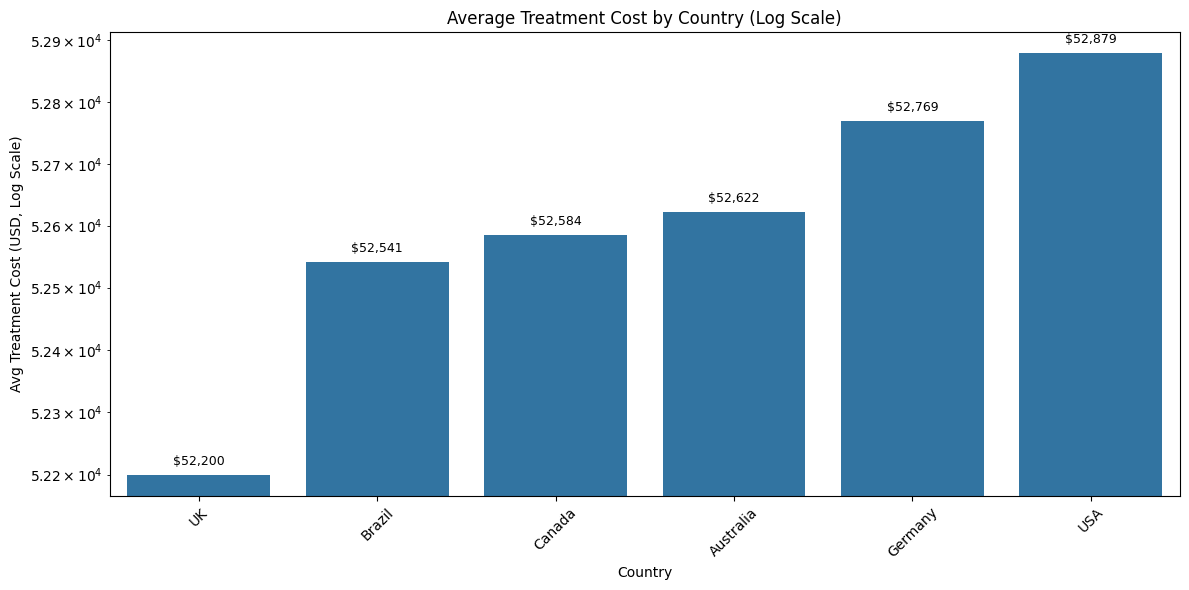

In [10]:
avg_cost_by_country = df.groupby('Country_Region')['Treatment_Cost_USD'].mean().sort_values()

# Plot 1: Average Treatment Cost by Country (Log Scale) with adjusted labels
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=avg_cost_by_country.index, y=avg_cost_by_country.values)
plt.yscale('log')
plt.title('Average Treatment Cost by Country (Log Scale)')
plt.ylabel('Avg Treatment Cost (USD, Log Scale)')
plt.xlabel('Country')
plt.xticks(rotation=45)

# Add annotations just above each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f"${height:,.0f}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # Offset: 5 points above bar
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

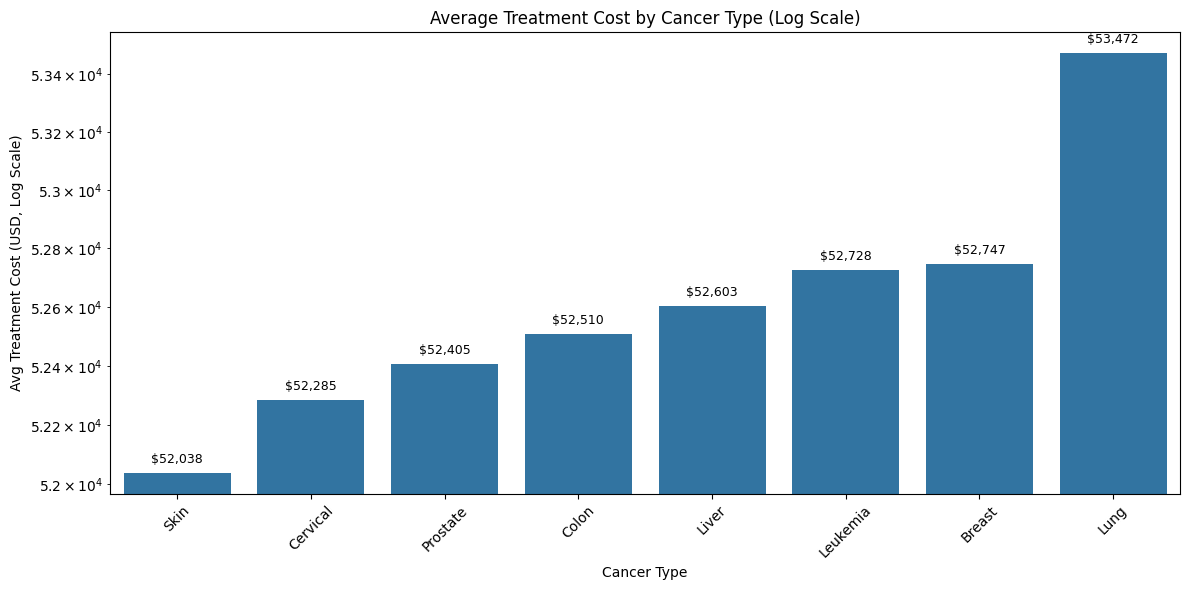

In [11]:
avg_cost_by_cancer = df.groupby('Cancer_Type')['Treatment_Cost_USD'].mean().sort_values()

# Plot 2: Average Treatment Cost by Cancer Type (Log Scale) with adjusted labels
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=avg_cost_by_cancer.index, y=avg_cost_by_cancer.values)
plt.yscale('log')
plt.title('Average Treatment Cost by Cancer Type (Log Scale)')
plt.ylabel('Avg Treatment Cost (USD, Log Scale)')
plt.xlabel('Cancer Type')
plt.xticks(rotation=45)

# Add annotations just above each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f"${height:,.0f}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # Offset: 5 points above bar
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

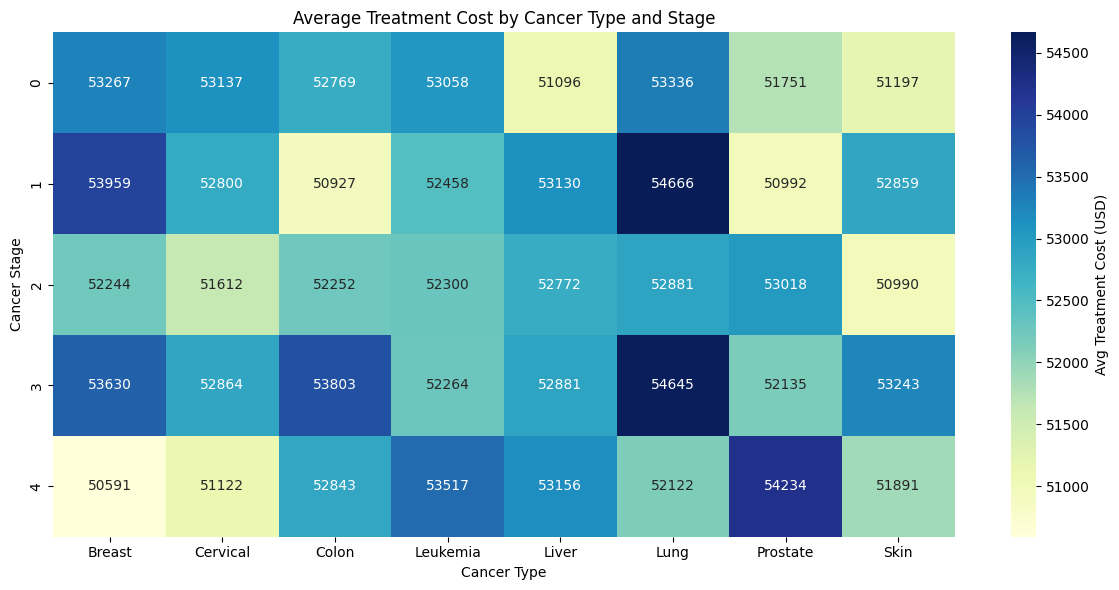

In [16]:
# 2. Comparação cruzada: Cancer Stage vs Cancer Type (médias agrupadas)
pivot_stage_type = df.pivot_table(values='Treatment_Cost_USD',
                                  index='Cancer_Stage',
                                  columns='Cancer_Type',
                                  aggfunc='mean')

# 3. Heatmap: custo médio por tipo de câncer e estágio
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_stage_type, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Avg Treatment Cost (USD)'})
plt.title('Average Treatment Cost by Cancer Type and Stage')
plt.xlabel('Cancer Type')
plt.ylabel('Cancer Stage')
plt.tight_layout()
plt.show()